In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from lightgbm import LGBMClassifier

In [2]:
# Load the data
train_data = pd.read_csv('train.csv')

In [3]:
# Display the first few rows of the DataFrame
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Check for missing values
train_data.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64

In [5]:
# Check for duplicated values

duplicates = train_data.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()

print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 0


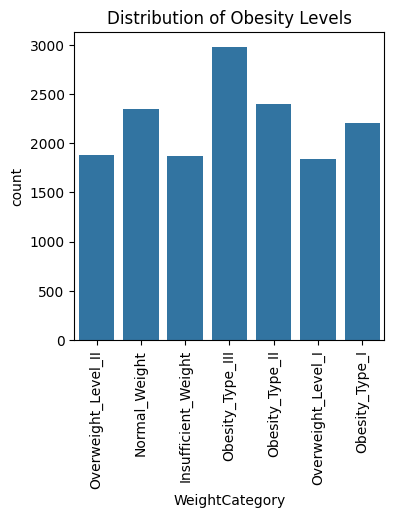

In [6]:
# Visualize the distribution of the target variable (NObeyesdad)

plt.figure(figsize=(4, 4))
sns.countplot(x='WeightCategory', data=train_data)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Encode target variable into numerical labels
label_encoder = LabelEncoder()
train_data['WeightCategory'] = label_encoder.fit_transform(train_data['WeightCategory'])

In [8]:
# Split features and target variable

X = train_data.drop(columns=['WeightCategory'])
y = train_data['WeightCategory']

In [9]:
# Define categorical and numerical features

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [10]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [12]:
# Define the LGBM model
lgbm_model = LGBMClassifier(verbose=1)

In [13]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', lgbm_model)])

In [14]:
# Define hyperparameters for randomized search
param_grid = {
    'classifier__n_estimators': [300],
    'classifier__max_depth': [5],
    'classifier__learning_rate': [0.045],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.45],
    'classifier__min_child_samples': [45],
    'classifier__reg_alpha': [0.5],
    'classifier__reg_lambda': [0.1],
    'classifier__min_child_weight': [0.005]

    # {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.5, 'classifier__n_estimators': 300, 'classifier__min_child_weight': 0.005, 'classifier__min_child_samples': 45, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.045, 'classifier__colsample_bytree': 0.45}
}

In [16]:
# Perform randomized search cross-validation

random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   n_iter=100, 
                                   cv=3, 
                                   verbose=1, 
                                   random_state=42, 
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 12426, number of used features: 28
[LightGBM] [Info] Start training from score -2.098453
[LightGBM] [Info] Start training from score -1.905146
[LightGBM] [Info] Start training from score -1.955046
[LightGBM] [Info] Start training from score -1.857619
[LightGBM] [Info] Start training from score -1.653952
[LightGBM] [Info] Start training from score -2.141355
[LightGBM] [Info] Start training from score -2.102397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,estimator,Pipeline(step...(verbose=1))])
,param_distributions,"{'classifier__colsample_bytree': [0.45], 'classifier__learning_rate': [0.045], 'classifier__max_depth': [5], 'classifier__min_child_samples': [45], ...}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [17]:
# Get the best parameters

best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [18]:
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.5, 'classifier__n_estimators': 300, 'classifier__min_child_weight': 0.005, 'classifier__min_child_samples': 45, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.045, 'classifier__colsample_bytree': 0.45}


In [19]:
# Evaluate the best model on the validation set
accuracy = best_model.score(X_test, y_test)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9066623752816222


c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
# best model on entire dataset
best_model.fit(X,y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2038
[LightGBM] [Info] Number of data points in the train set: 15533, number of used features: 28
[LightGBM] [Info] Start training from score -2.117028
[LightGBM] [Info] Start training from score -1.890681
[LightGBM] [Info] Start training from score -1.951333
[LightGBM] [Info] Start training from score -1.866249
[LightGBM] [Info] Start training from score -1.650037
[LightGBM] [Info] Start training from score -2.131030
[LightGBM] [Info] Start training from score -2.111163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# Prepare test data

test_data = pd.read_csv('test.csv')

In [24]:
# Make predictions on test data
test_predictions = best_model.predict(test_data)

c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [25]:
# Create submission dataframe
submission_df = pd.DataFrame({'id': test_data['id'], 
                              'weightCategory': label_encoder.inverse_transform(test_predictions)})

In [26]:
# Save submission dataframe to CSV
submission_df.to_csv('submission_lgbm.csv', index=False)